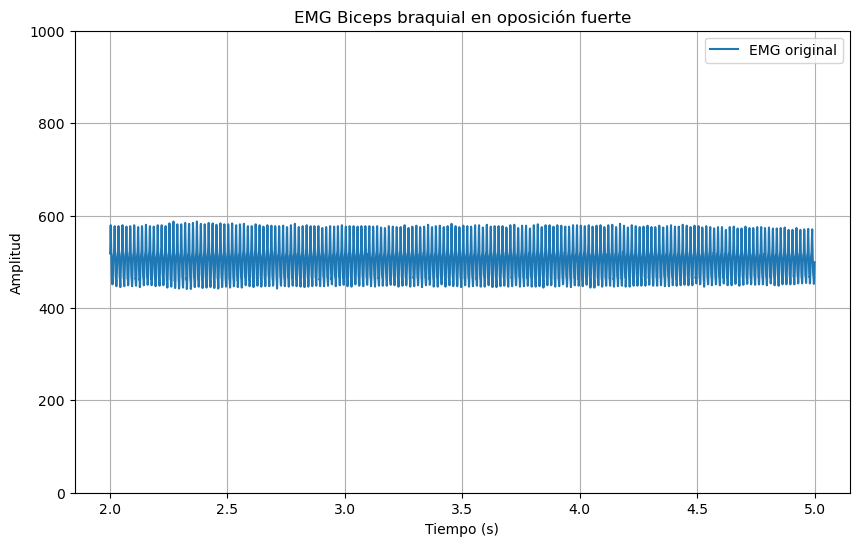

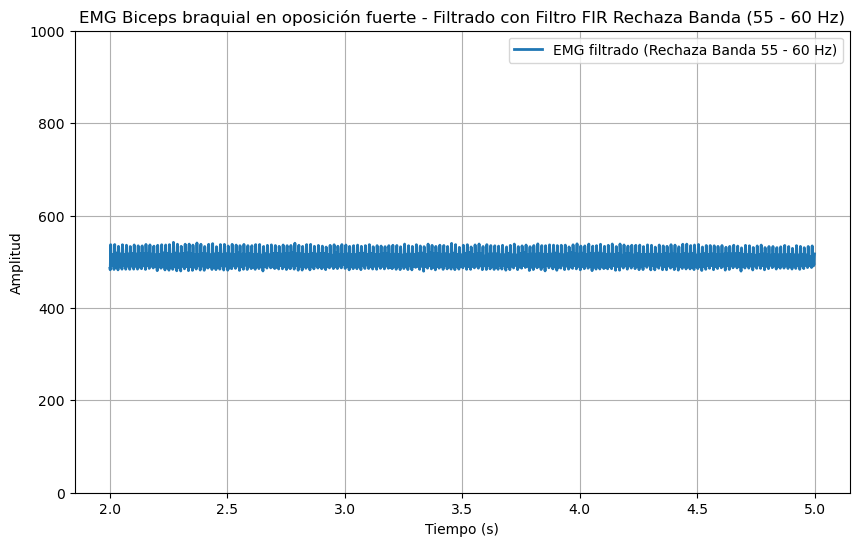

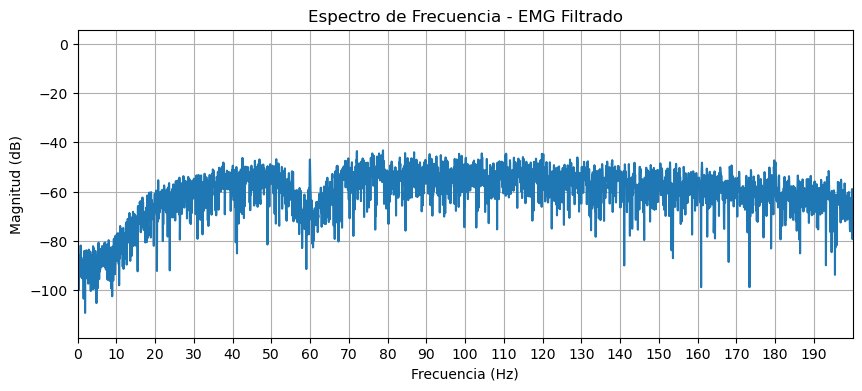

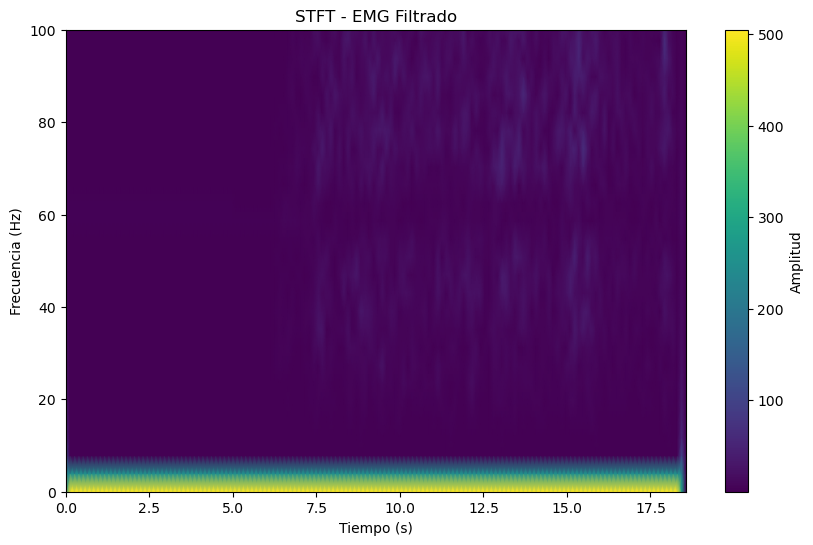

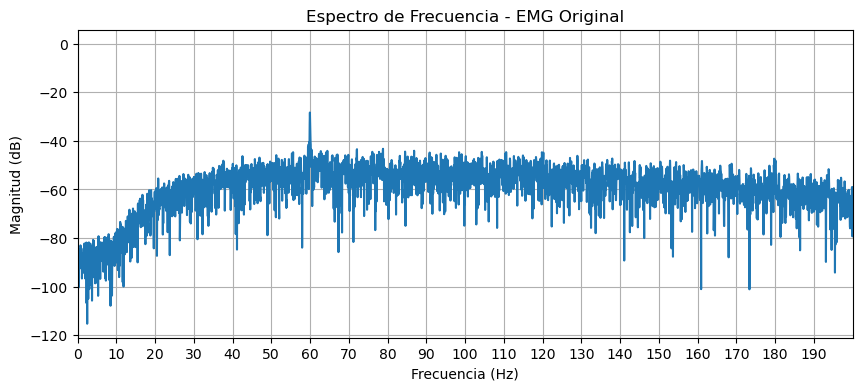

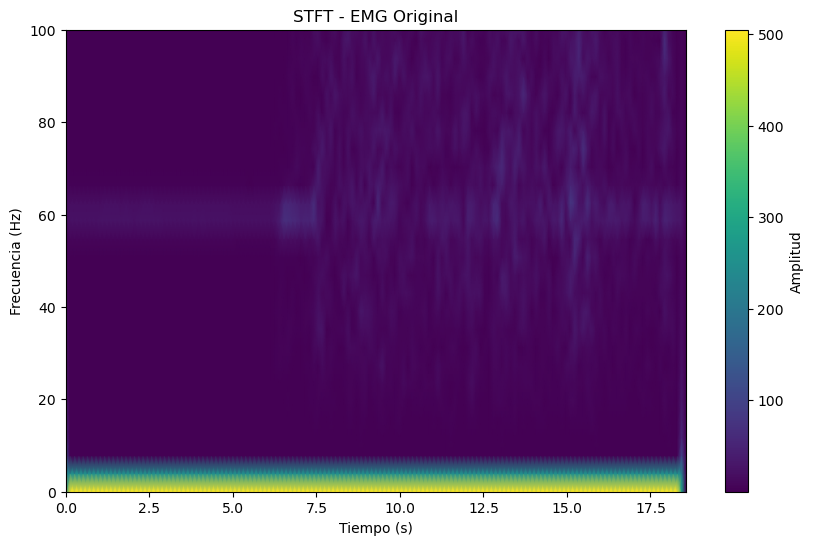

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal as sig

# Función para graficar la señal en el dominio de la frecuencia (FFT)
def plot_fft(signal, fs, title, filename):
    N = len(signal)
    fft_values = np.fft.fft(signal)
    fft_magnitude = np.abs(fft_values)[:N//2]
    fft_frequencies = np.fft.fftfreq(N, 1/fs)[:N//2]
    fft_magnitude_db = 20 * np.log10(fft_magnitude / np.max(fft_magnitude))  # Magnitud en decibelios

    plt.figure(figsize=(10, 4))
    plt.plot(fft_frequencies, fft_magnitude_db)
    plt.grid(True)
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud (dB)")
    plt.title(title)
    plt.xlim([0, 200])  # Ajusta el límite de frecuencia según sea necesario
    plt.xticks(np.arange(0, 200, 10))
    plt.savefig(f"{filename}.png", format='png')
    plt.show()

# Función para graficar la STFT (Transformada de Fourier de Ventana Corta)
def plot_stft(signal, fs, title, filename):
    f, t, Zxx = sig.stft(signal, fs=fs, nperseg=256)  # STFT con ventana de 256 muestras
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    plt.title(title)
    plt.ylabel('Frecuencia (Hz)')
    plt.xlabel('Tiempo (s)')
    plt.ylim([0, 100])
    plt.colorbar(label='Amplitud')
    plt.savefig(f"{filename}.png", format='png')
    plt.show()

# Cargar el archivo de señal EMG
file_path = 'D:\\Marco Ichillumpa\\Semestre 2024 - 2\\ISB\\Filtros - Lab 7\\Señales\\Bicep_fuerte.txt'
data = pd.read_csv(file_path, sep='\t', skiprows=10, header=None)

# Frecuencia de muestreo
fs = 1000  # Frecuencia de muestreo en Hz

# Extraer la columna de la señal EMG (columna 6)
emg_signal = data[5].dropna().values

# Definir las frecuencias de corte (normalizadas por la frecuencia de Nyquist)
nyquist = fs / 2
lowcut = 57 / nyquist  # Normalizada: 0.059
highcut = 64 / nyquist  # Normalizada: 0.061

# Crear el filtro FIR usando la ventana Blackman y las frecuencias de corte especificadas
order = 259  # Orden del filtro FIR
fir_coeff = sig.firwin(order, [lowcut, highcut], window='blackman', pass_zero=True)

# Aplicar el filtro a la señal EMG usando filtfilt para evitar desfase
filtered_emg = sig.filtfilt(fir_coeff, 1.0, emg_signal)

# Crear el vector de tiempo
t = np.arange(0, len(emg_signal)) / fs

# Definir los límites de tiempo para graficar de 2 a 7 segundos
start_time = 2  # segundos
end_time = 5  # segundos

# Convertir los tiempos a índices
start_index = int(start_time * fs)
end_index = int(end_time * fs)

# Gráfica de la señal original
plt.figure(figsize=(10, 6))
plt.plot(t[start_index:end_index], emg_signal[start_index:end_index], label='EMG original')
plt.title('EMG Biceps braquial en oposición fuerte')
plt.ylim(0, 1000)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.savefig("EMG3.png", format='png')  # Guardar gráfica de la señal original en el tiempo
plt.show()

# Gráfica de la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(t[start_index:end_index], filtered_emg[start_index:end_index], label='EMG filtrado (Rechaza Banda 55 - 60 Hz)', linewidth=2)
plt.title('EMG Biceps braquial en oposición fuerte - Filtrado con Filtro FIR Rechaza Banda (55 - 60 Hz)')
plt.ylim(0, 1000)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.savefig("EMG3_FILTRO3.png", format='png')
plt.show()

# Para la señal filtrada
plot_fft(filtered_emg, fs, 'Espectro de Frecuencia - EMG Filtrado', 'FFT_EMG3_FILTRO3')

# Graficar la STFT (Transformada de Fourier de Ventana Corta)
plot_stft(filtered_emg, fs, 'STFT - EMG Filtrado', "STFT_EMG3_FILTRO3")

# Graficar el dominio de la frecuencia para la señal original
plot_fft(emg_signal, fs, 'Espectro de Frecuencia - EMG Original','FFT_EMG3')

# Graficar la STFT (Transformada de Fourier de Ventana Corta) para la señal original
plot_stft(emg_signal, fs, 'STFT - EMG Original', "STFT_EMG3")